# Pronalaženje početka replikacije

## Naivni algoritam

Naivni algoritam prolazi kroz sekvencu i prebrojava pojavljivanje svake podniske dužine k

In [1]:
'''Prebrojavanje pojavljivanja zadatog uzorka u tekstu (naivni algoritam)'''
def pattern_count(text, pattern):
    count = 0 # Brojač pojavljivanja
    
    n = len(text)     # - Dužina teksta
    k = len(pattern)  # - Dužina uzorka
    for i in range(0, n - k + 1):
        curr_pattern = text[i: i + k]
        if curr_pattern == pattern:
            count += 1

    return count

In [2]:
text = 'CATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCA'
pattern = 'AAATTT'
pattern_count(text, pattern)

4

In [3]:
'''Pronalaženje najzastupljenijih reči u tekstu (naivni pristup)'''
def frequent_words(text, k):
    frequent_words = set([])
    n = len(text)
    
    counts = [0 for i in range(n - k + 1)] # - niz brojača, count(i) = broj pojavljivanja podniske text[i : i+k]

    # Prebrojavanje pojavljivanja svih uzoraka dužine k
    for i in range(n - k + 1):
        pattern = text[i : i + k]
        counts[i] = pattern_count(text, pattern)
        
    max_count = max(counts)
    
    # Izdvajanje najzastupljenijih uzoraka dužine k
    for i in range(0, n - k + 1):
        if counts[i] == max_count:
            pattern = text[i : i + k]
            frequent_words.add(pattern)
    
    return list(frequent_words)

In [4]:
text = 'CATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCA'
k = 6
frequent_words(text, k)

['AAATTT']

## Napredniji algoritam

Napredniji algoritam koristi tehniku mapiranja uzoraka nukleotidnih sekvenci, sastavljenih od 4 nukleotida - A, T, C, i G, na brojeve. Sve sekvence dužine k mogu se mapirati na redne brojeve u intervalu $[0,4^{k}-1]$ 

In [5]:
'''Mapiranje pojedinačnih nukleotida na brojeve'''

def symbol_to_number(symbol):
    mapping = {
        'A': 0,
        'T': 1,
        'C': 2,
        'G': 3
    }
    upper_symbol = symbol.upper()
    
    if symbol not in mapping:
        print('Invalid symbol')
        return None
    
    return mapping[symbol]

In [6]:
symbol_to_number('A')

0

In [7]:
'''
Mapiranje sekvence na broj - ekvivalentno prevođenju broja iz sistema sa osnovom 4
u broj dekadnog sistema (A = 0, T = 1, C = 2, G = 3)
'''

def pattern_to_number(pattern):
    if len(pattern) == 1:
        return symbol_to_number(pattern)
    
    prefix = pattern[:-1]
    last_symbol = pattern[-1]
    
    return pattern_to_number(prefix) * 4 + symbol_to_number(last_symbol)

In [8]:
print(pattern_to_number('AAAAAAACTC'))
print(pattern_to_number('AACTC'))

38
38


In [9]:
'''Mapiranje brojeve iz intervala [0-3] na nukleotide'''

def number_to_symbol(number):
    mapping = {
        0: 'A',
        1: 'T',
        2: 'C',
        3: 'G'
    }
    if number not in [0,1,2,3]:
        print('Invalid number')
        return None
    
    return mapping[number]

In [10]:
number_to_symbol(3)

'G'

In [11]:
'''
Mapiranje broja na sekvencu zadate dužine - ekvivalentno prevođenju broja iz sistema sa osnovom 10
u zapis broja u sistemu sa osnovom 4
'''

def number_to_pattern(number, k):
    if k == 1:
        return number_to_symbol(number)
    
    prefix = number // 4
    remainder = number % 4
    
    return number_to_pattern(prefix, k - 1) + number_to_symbol(remainder)

In [12]:
print(number_to_pattern(38, 6))
print(number_to_pattern(38, 3))

AAACTC
CTC


In [13]:
'''
Prebrojavanje pojavljivanja uzoraka dužine k u tekstu
na osnovu mapiranja nukleotidnih sekvenci u broj
'''

def computing_frequencies(text, k):
    frequency_array = [0 for _ in range(4 ** k)] # - Niz brojača, frequency_array[i] = broj pojavljivanja uzorka i
    n = len(text)
    for i in range(0, n - k + 1):
        pattern = text[i : i + k] # - Izdvajanje uzorka
        j = pattern_to_number(pattern) # - Prevođenje uzorka u broj
        frequency_array[j] += 1 # - Inkrementacija brojača
        
    return frequency_array

In [14]:
computing_frequencies('ATCGTCGAA',2)

[1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0]

In [15]:
'''
Implementacija naprednijeg algoritma za pronalaženje najzastupljenijih
podniski dužine k u okviru nukleotidnih sekvenci
'''

def faster_frequent_words(text, k):
    frequent_patterns = set([])
    
    frequency_array = computing_frequencies(text, k) # - Prebrojavanje uzoraka dužine k
    
    max_count = max(frequency_array)
    
    for i in range(0, 4 ** k):
        if frequency_array[i] == max_count:
            pattern = number_to_pattern(i, k)
            frequent_patterns.add(pattern)
    
    return list(frequent_patterns)

In [16]:
text = 'CATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCA'
pattern = 'AAATTT'
pattern_count(text, pattern)

4

## Efikasnija implementacija naprednog algoritma

Efikasnija implementacija se zasniva na korišćenju strukture heš mape (`dict`) koja, analogno prethodnom mapiranju nukleotidnih sekvenci na broj, efikasno vrši skladištenje i indeksiranje bez čuvanja informacija o sekvencama koje se nisu ni pojavile

In [17]:
'''
Efikasnija implementacija algoritma za prebrojavanje
nukleotidnih podsekvenci
'''
def computing_frequencies_dict(text, k):
    frequency_array = dict([])
    n = len(text)
    for i in range(0, n - k + 1):
        pattern = text[i : i + k]
        if pattern not in frequency_array:
            frequency_array[pattern] = 1
        else:
            frequency_array[pattern] += 1
        
    return frequency_array

In [18]:
computing_frequencies_dict('ATCGTCGAA',2)

{'AT': 1, 'TC': 2, 'CG': 2, 'GT': 1, 'GA': 1, 'AA': 1}

In [19]:
'''
Efikasnija implementacija algoritma za pronalaženje najzastupljenijih
podniski dužine k u okviru nukleotidnih sekvenci
'''

def faster_frequent_words_dict(text, k):
    frequent_patterns = set([])
    frequency_array = computing_frequencies_dict(text, k)
    
    max_count = max(frequency_array.values())
    
    n = len(text)
    for pattern, count in frequency_array.items():
        if count == max_count:
#             pattern = number_to_pattern(i, k)
            frequent_patterns.add(pattern)
    
    return list(frequent_patterns)

In [20]:
text = 'CATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCA'
faster_frequent_words_dict(text, 6)

['AAATTT']

## Algoritam za pronalaženje najzastupljenijih nukleotidnih podsekvenci dužine k sa do d dozvoljenih pogrešnih poklapanja karaktera

Algoritam se zasniva na pronalaženju skupa kandidata, sekvenci sa najviše d razlika u odnosu na traženi uzorak, a zatim primenu naprednijeg algoritma za pronalaženje uzoraka među izdvojenim susedima

In [21]:
'''Izračunavanje Hamingovog rastojanja između dve sekvence jednake dužine'''

def hamming_distance(sequence_1, sequence_2):
    n = len(sequence_1)
    dist = 0
    for i in range(n):
        if sequence_1[i] != sequence_2[i]:
            dist += 1
            
    return dist

In [22]:
sequence_1 = 'ABCD'
sequence_2 = 'BBCC'

hamming_distance(sequence_1, sequence_2)

2

In [23]:
'''
Pronalaženje direktnih suseda uzorka - sekvenci 
sa najviše jednom razlikom u odnosu na uzorak
'''

def immediate_neighbors(pattern):
    neighborhood = set([pattern])
    n = len(pattern)
    for i in range(n):
        curr_nucleotide = pattern[i]
        
        for nucleotide in ['A','T','C','G']:
            if curr_nucleotide != nucleotide:      # Zbog imutabilnosti niski, direktna zamena karaktera nije moguća
                new_pattern_list = list(pattern)        # - Pretvaranje niske u listu karaktera
                new_pattern_list[i] = nucleotide        # - Zamena nukleotida na i-toj poziciji
                new_pattern = ''.join(new_pattern_list) # - Pretvaranje liste karaktera u nisku
                neighborhood.add(new_pattern)
                
    return list(neighborhood)

In [24]:
immediate_neighbors('AAA')

['AAT', 'AAC', 'TAA', 'AAA', 'AAG', 'ACA', 'AGA', 'GAA', 'CAA', 'ATA']

In [25]:
'''
Iterativni algoritam za pronalaženje susednih uzoraka 
sa najviše d razlika u odnosu na zadati uzorak.
Bazira se na iterativnom pronalaženju direktnih suseda skupa uzoraka
tokom d iteracija
'''

def iterative_neighbors(pattern, d):
    neighborhood = set([pattern])
    for _ in range(d):
        for neighbor in neighborhood:
            new_neigbors = immediate_neighbors(neighbor)
            neighborhood = set(list(neighborhood) + new_neigbors)
            
    return list(neighborhood)

In [26]:
iterative_neighbors('AA', 2)

['GA',
 'GG',
 'CT',
 'AG',
 'GC',
 'AC',
 'TG',
 'TT',
 'CC',
 'TC',
 'CA',
 'TA',
 'AA',
 'AT',
 'GT',
 'CG']

In [27]:
'''
Rekurzivni algoritam za pronalaženje susednih uzoraka
sa najviše d razlika u odnosu na zadati uzorak.
Bazira se na pronalaženju suseda dužine k-1 a zatim
nadovezivanjem prvog, izmenjenog, karaktera uzorka,
ukoliko sused dužine k ima manje od d izmena 
ili, u suprotnom, nadovezivanjem prvog karaktera polaznog uzorka
'''

def neighbors(pattern, d):
    if d == 0:
        return { pattern }
    if len(pattern) == 1:
        return { 'A', 'T', 'C', 'G' }
    
    neighborhood = set([])
    suffix = pattern[1:]
    
    suffix_neighbors = neighbors(suffix, d)
    for text in suffix_neighbors:
        new_neighbor = None # opciono
        if hamming_distance(text, suffix) < d:
            for x in ['A', 'T', 'C', 'G']:
                new_neighbor = x + text
                neighborhood.add(new_neighbor)
        else:
            new_neighbor = pattern[0] + text
            neighborhood.add(new_neighbor)
        
    return list(neighborhood)

In [28]:
neighbors('AA', 2)

['GA',
 'GG',
 'CT',
 'AG',
 'AC',
 'TT',
 'GC',
 'TG',
 'CC',
 'CG',
 'TC',
 'TA',
 'AA',
 'AT',
 'GT',
 'CA']

In [29]:
'''Prebrojavanje uzoraka sa najviše d razlika u odnosu na zadati uzorak'''

def approximate_pattern_count(text, pattern, d):
    n = len(text)
    k = len(pattern)
    count = 0
    
    for i in range(n - k + 1):
        curr_pattern = text[i : i + k]
        if hamming_distance(curr_pattern, pattern) <= d:
            count += 1
            
    return count

In [30]:
'''
Implementacija algoritma za pronalaženje najzastupljenijih
podniski dužine k u okviru nukleotidnih sekvenci sa najviše d odstupanja
'''

def frequent_words_with_missmatches(text, k, d):
    frequent_patterns = set([])
    frequency_array = [0 for _ in range(4 ** k)]
    close = [0 for _ in range(4 ** k)] # - Niz potencijalnih kandidata
    
    n = len(text)
    for i in range(n - k + 1):
        pattern = text[i : i + k]            # - Izdvajanje uzorka
        neighborhood = neighbors(pattern, d) # - Pronalaženje suseda uzorka
        for neighbor in neighborhood:
            j = pattern_to_number(neighbor)  # - Mapiranje susednog uzorka u broj
            close[j] = 1                     # - Evidentiranje suseda kao potencijalnog kandidata
            
    # Prebrojavanje potencijalnih kandidata
    for i in range(4 ** k):
        if close[i] == 1:
            pattern = number_to_pattern(i, k)
            frequency_array[i] = approximate_pattern_count(text, pattern, d)
            
    
    max_count = max(frequency_array)
    
    for i in range(0, 4 ** k):
        if frequency_array[i] == max_count:
            pattern = number_to_pattern(i, k)
            frequent_patterns.add(pattern)
    
    return list(frequent_patterns)

In [31]:
text = 'CATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCA'
k = 6
d = 1

frequent_words_with_missmatches(text, k, d)

['AATTTT', 'AAATTT', 'AAAATT']

## Efikasnija implementacija algoritma za pronalaženje najzastupljenijih uzoraka sa dozvoljenim odstupanjem

Bolja efikasnost se dobija korišćenjem `dict` strukture podataka za čuvanje broja pojavljivanja

In [32]:
'''
Efikasnija implementacija algoritma za pronalaženje najzastupljenijih
podniski dužine k u okviru nukleotidnih sekvenci sa najviše d odstupanja
'''

def frequent_words_with_missmatches_dict(text, k, d):
    frequent_patterns = set([])
    frequency_array = dict([])
    
    n = len(text)
    for i in range(n - k + 1):
        pattern = text[i : i + k]                    # - Izdvajanje uzorka
        neighborhood = neighbors(pattern, d)         # - Pronalaženje suseda uzorka
        for neighbor in neighborhood:
            if neighbor not in frequency_array:      # - Već prebrojani uzorci se ignorišu
                frequency_array[neighbor] = approximate_pattern_count(text, pattern, d)
            
    
    max_count = max(frequency_array.values())
    
    for pattern, count in frequency_array.items():
        if count == max_count:
            frequent_patterns.add(pattern)
    
    return list(frequent_patterns)

In [33]:
text = 'CATAAATTTCGTATGTATCAAAATTTTGTTACTATCACATAAATTTCGTATGTATCAAAATTTTGTTACTATCA'
k = 6
d = 1

frequent_words_with_missmatches(text, k, d)

['AATTTT', 'AAATTT', 'AAAATT']

## Analiza G-C sastava
G-C skew dijagram oslikava odnos G i C nukleotida duž sekvence, minimum G-C skew dijagrama može biti dobar pokazatelj pozicije početka replikacije (OriC segmenta) unutar koga se pronalaze najzastupljenije podsekvence (dnaA boksovi)

In [34]:
'''Izračunavanje vrednosti G-C skew dijagrama'''
def compute_gc(dna):
    skew = [0 for _ in dna]
    curr_sum = 0
    
    n = len(dna)
    for i in range(n):
        if dna[i] == 'G':
            curr_sum += 1
        elif dna[i] == 'C':
            curr_sum -= 1
            
        skew[i] = curr_sum
        
    return skew


In [35]:
gc_skew = compute_gc('CCATGTAGCGAGTGATC')

Za crtanje dijagrama biće korišćena `matplotlib` biblioteka

In [36]:
import matplotlib.pyplot as plt

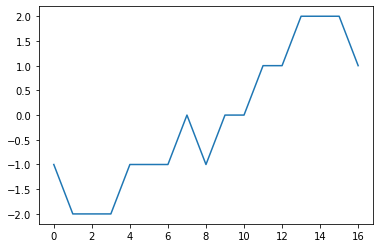

In [37]:
_ = plt.plot(gc_skew)

Analiza G-C raspodele nad genomom e. coli

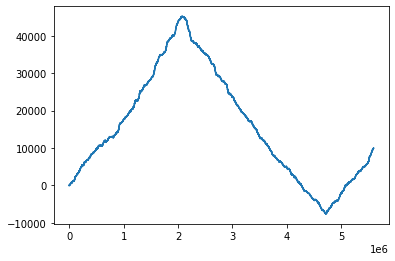

In [38]:
# Učitavanje e. coli genoma iz fajla u fasta formatu
e_coli = ''.join(open('e_coli.fna','r').read().split('\n')[1:])

# Izračunavanje i crtanje dijagrama
gc_skew = compute_gc(e_coli)
_ = plt.plot(gc_skew)